# 변수 선택법

<a id= '0'></a>

## Table of contents    
1. [회귀분석 과제 리뷰](#1)   
2. [VIF](#2)  
3. [정성적 방안: 변수선택법 활용](#3)
4. [기술적 방안](#4)
5. [Adjusted $R^2$](#5)
6. [명목형 변수 처리](#6)

<a id= '1'></a>

## [회귀분석 과제 리뷰](#0)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [5]:
df.isnull().sum()

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

In [6]:
# input과 output을 정의
Input= df.iloc[:,:-1]
Output = df.iloc[:,-1]

# pandas -> numpy
X = Input.values
y = Output.values

In [7]:
# regression model 생성 및 학습
rl = LinearRegression()
rl.fit(X,y)

LinearRegression()

In [8]:
# prediction
y_hat = rl.predict(Input)

In [13]:
print('기울기: ',rl.coef_)
print('절편:', rl.intercept_)
print('R^2: ', rl.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

기울기:  [ 1.25855871e-03  1.13992300e-02  3.54788012e+00 -8.31250759e-02
 -1.47501679e+00 -3.96534069e-04 -5.88706540e-01 -1.35226625e+01
 -9.20011566e-01  3.12079206e-01  5.04950616e-02 -1.15933807e-02
  3.44424430e+00]
절편: 35.07083373191912
R^2:  0.7367002126495195
MSE:  21.894831181729206


In [14]:
# 모델 평가를 위해 처음부터 train과 test를 나눠서 모델링하는 게 더 바람직함.
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1004)

In [15]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [16]:
# train set만을 이용해서 모형 학습
rl= LinearRegression()
rl.fit(X_train, y_train)
# train set에서의 성능
y_train_hat = rl.predict(X_train)
print('train셋 MSE: ', mean_squared_error(y_train,y_train_hat))
print('train셋 R^2: ', rl.score(X_train, y_train))
# test set에서의 성능
y_test_hat = rl.predict(X_test)
print('*' *30)
print('test셋 MSE:', mean_squared_error(y_test,y_test_hat))
print('test셋 R^2: ', rl.score(X_test, y_test))

train셋 MSE:  22.928871857314128
train셋 R^2:  0.7282123460763663
******************************
test셋 MSE: 19.450267341373532
test셋 R^2:  0.7695977191610004


### 과연 13개의 독립변수를 모두 사용하는 것이 성능이 좋을까?

#### Q1. 독립변수간의 상관관계가 있지 않을까?

In [17]:
df.corr()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
AGE,1.000000,-0.273534,-0.240265,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.569537,0.506456,0.086518,-0.376955
B,-0.273534,1.000000,0.128069,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.175520,-0.441808,0.048788,0.333461
RM,-0.240265,0.128069,1.000000,-0.219247,0.205246,-0.391676,-0.613808,-0.302188,-0.355501,-0.209847,0.311991,-0.292048,0.091251,0.695360
CRIM,0.352734,-0.385064,-0.219247,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.200469,0.582764,-0.055892,-0.388305
DIS,-0.747881,0.291512,0.205246,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.664408,-0.534432,-0.099176,0.249929
INDUS,0.644779,-0.356977,-0.391676,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.533828,0.720760,0.062938,-0.483725
LSTAT,0.602339,-0.366087,-0.613808,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.412995,0.543993,-0.053929,-0.737663
NOX,0.731470,-0.380051,-0.302188,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.516604,0.668023,0.091203,-0.427321
PTRATIO,0.261515,-0.177383,-0.355501,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.391679,0.460853,-0.121515,-0.507787
RAD,0.456022,-0.444413,-0.209847,0.625505,-0.494588,0.595129,0.488676,0.611441,0.464741,1.000000,-0.311948,0.910228,-0.007368,-0.381626


<AxesSubplot:>

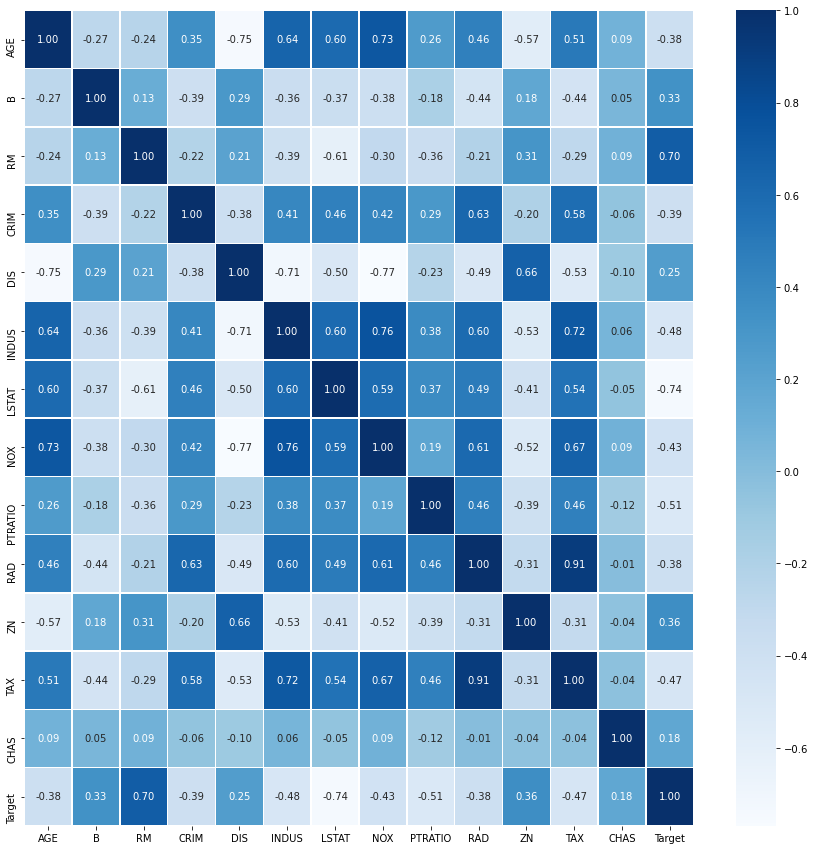

In [18]:
# 시각화를 시켜서 좀 더 편하게 해석
plt.figure(figsize=(15,15))

sns.heatmap(data = df.corr(), annot=True, 
            fmt = '.2f', linewidths=.5, cmap='Blues')

TAX와 RAD간의 높은 상관관계를 확인할 수 있음.

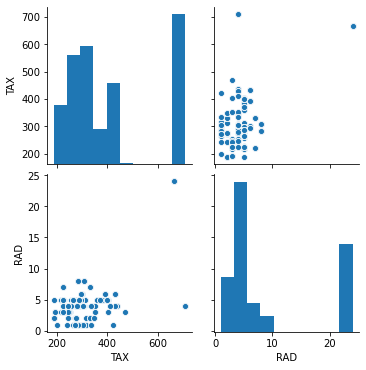

In [17]:
# pairplot으로써 좀 더 자세히 시각화시켜보면,
sns.pairplot(df[['TAX', 'RAD']])

<a id= '2'></a>

## [VIF](#0)

In [18]:
# 시각화 이외에도 VIF를 이용해서 correlation을 확인할 수 있음.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Input.values, i) for i in range(X.shape[1])]
vif["features"] = Input.columns
vif

,VIF Factor,features
0,21.386850,AGE
1,20.104943,B
2,77.948283,RM
3,2.100373,CRIM
4,14.699652,DIS
5,14.485758,INDUS
6,11.102025,LSTAT
7,73.894947,NOX
8,85.029547,PTRATIO
9,15.167725,RAD


### 실습: aromawine 데이터 vif 확인하기

In [20]:
wine = pd.read_excel('wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


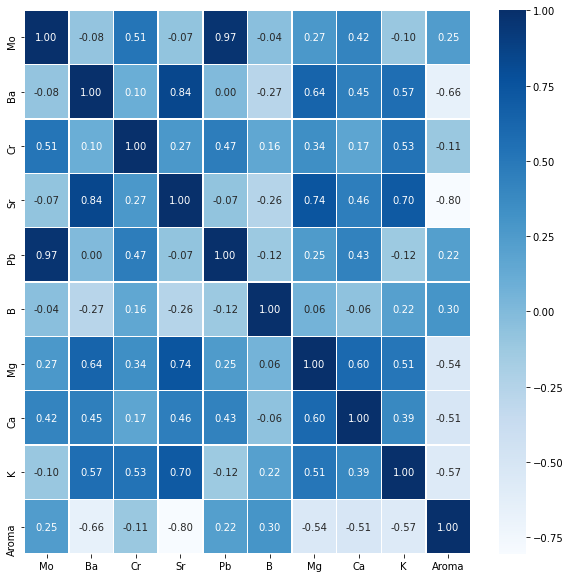

In [21]:
# correlation 시각화
plt.figure(figsize=(10,10))

sns.heatmap(data = wine.corr(), annot=True, 
            fmt = '.2f', linewidths=.5, cmap='Blues')

In [22]:
# 독립 변수와 종속 변수 나누기
Input_wine = wine.iloc[:,:-1]
Output_wine = wine.iloc[:,-1]

In [ ]:
a = []
for i in range(input_wine.shape[1]):
    a.append(variance_inflation_factor(Input.values, i))

In [23]:
# VIF 구하기
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Input_wine.values, i) 
                     for i in range(Input_wine.shape[1])]
vif["features"] = Input_wine.columns
vif

,VIF Factor,features
0,85.311791,Mo
1,28.700675,Ba
2,18.610717,Cr
3,40.164814,Sr
4,95.631351,Pb
5,27.587390,B
6,61.935836,Mg
7,52.573653,Ca
8,94.803892,K


<a id= '3'></a>

## [정성적 방안: 변수선택법 활용](#0)
1. [전진선택법](#ex1)
2. [후진제거법](#ex2)

In [25]:
!pip install mlxtend
# 터미널 내에서 다운로드

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [30]:
?SFS

<a id='ex1'></a>

### [전진선택법](#3)

In [31]:
fs = SFS(LinearRegression(),
           k_features=5, forward=True, floating=False, scoring = 'r2', cv = 0)

fs.fit(Input,Output)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=5,
                          scoring='r2')

In [32]:
fs.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.5441463]),
  'avg_score': 0.5441462975864797,
  'feature_names': ('LSTAT',)},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.63856161]),
  'avg_score': 0.6385616062603403,
  'feature_names': ('RM', 'LSTAT')},
 3: {'feature_idx': (2, 6, 8),
  'cv_scores': array([0.67862416]),
  'avg_score': 0.6786241601613112,
  'feature_names': ('RM', 'LSTAT', 'PTRATIO')},
 4: {'feature_idx': (2, 4, 6, 8),
  'cv_scores': array([0.6903077]),
  'avg_score': 0.6903077016842538,
  'feature_names': ('RM', 'DIS', 'LSTAT', 'PTRATIO')},
 5: {'feature_idx': (2, 4, 6, 7, 8),
  'cv_scores': array([0.70808929]),
  'avg_score': 0.7080892893529662,
  'feature_names': ('RM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO')}}

In [33]:
pd.DataFrame.from_dict(fs.get_metric_dict()).T

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)",[0.5441462975864797],0.544146,"(LSTAT,)",NaN,0,NaN
2,"(2, 6)",[0.6385616062603403],0.638562,"(RM, LSTAT)",NaN,0,NaN
3,"(2, 6, 8)",[0.6786241601613112],0.678624,"(RM, LSTAT, PTRATIO)",NaN,0,NaN
4,"(2, 4, 6, 8)",[0.6903077016842538],0.690308,"(RM, DIS, LSTAT, PTRATIO)",NaN,0,NaN
5,"(2, 4, 6, 7, 8)",[0.7080892893529662],0.708089,"(RM, DIS, LSTAT, NOX, PTRATIO)",NaN,0,NaN


In [37]:
print(f'전진선택법시 R^2: {fs.k_score_:.4f}')
print('전진선택법시 Feature Index: ', fs.k_feature_idx_)

전진선택법시 R^2: 0.7081
전진선택법시 Feature Index:  (2, 4, 6, 7, 8)


In [38]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


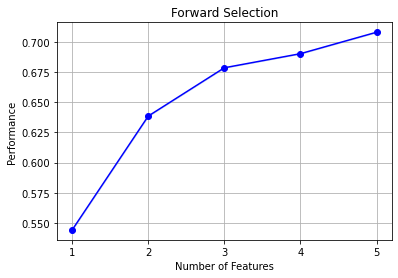

In [39]:
fig = plot_sfs(fs.get_metric_dict())
plt.title('Forward Selection')
plt.grid()
plt.show()

<a id='ex2'></a>

### [후진제거법](#3)

In [41]:
# forward = False로써 후진제거법 사용 가능.
bs = SFS(LinearRegression(),
           k_features=5, forward=False, floating=False,scoring = 'r2', cv = 0)

bs.fit(Input,Output)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=5, scoring='r2')

In [42]:
pd.DataFrame.from_dict(bs.get_metric_dict()).T

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.7406426641094095],0.740643,"(AGE, B, RM, CRIM, DIS, INDUS, LSTAT, NOX, PTR...",NaN,0,NaN
12,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.7406412165505145],0.740641,"(B, RM, CRIM, DIS, INDUS, LSTAT, NOX, PTRATIO,...",NaN,0,NaN
11,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)",[0.7405822802569575],0.740582,"(B, RM, CRIM, DIS, LSTAT, NOX, PTRATIO, RAD, Z...",NaN,0,NaN
10,"(1, 2, 3, 4, 6, 7, 8, 9, 10, 11)",[0.7352631473231817],0.735263,"(B, RM, CRIM, DIS, LSTAT, NOX, PTRATIO, RAD, Z...",NaN,0,NaN
9,"(1, 2, 3, 4, 6, 7, 8, 9, 11)",[0.7292543470977955],0.729254,"(B, RM, CRIM, DIS, LSTAT, NOX, PTRATIO, RAD, TAX)",NaN,0,NaN
8,"(1, 2, 3, 4, 6, 7, 8, 9)",[0.7239765998018792],0.723977,"(B, RM, CRIM, DIS, LSTAT, NOX, PTRATIO, RAD)",NaN,0,NaN
7,"(1, 2, 4, 6, 7, 8, 9)",[0.7187395846343028],0.71874,"(B, RM, DIS, LSTAT, NOX, PTRATIO, RAD)",NaN,0,NaN
6,"(1, 2, 4, 6, 7, 8)",[0.7153894128095097],0.715389,"(B, RM, DIS, LSTAT, NOX, PTRATIO)",NaN,0,NaN
5,"(2, 4, 6, 7, 8)",[0.7080892893529662],0.708089,"(RM, DIS, LSTAT, NOX, PTRATIO)",NaN,0,NaN


C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


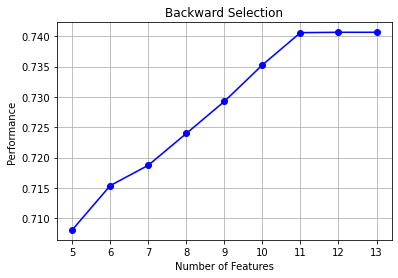

In [43]:
fig = plot_sfs(bs.get_metric_dict())
plt.title('Backward Selection')
plt.grid()
plt.show()

In [44]:
print(f'후진제거법시 R^2: {fs.k_score_:.4f}')
print('후진제거법시 Feature Index: ', fs.k_feature_idx_)

후진제거법시 R^2: 0.7081
후진제거법시 Feature Index:  (2, 4, 6, 7, 8)


### 실습: wine-aroma data 전진선택법 (선택변수 3개)

In [45]:
Input_wine = wine.iloc[:,:-1]
Output_wine = wine.iloc[:,-1]

In [46]:
# SFS 객체 생성

# SFS 객체 fit

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=5,
                          scoring='r2')

In [49]:
pd.DataFrame(fs.get_metric_dict()).T

C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)",[0.6468795799391083],0.64688,"(Sr,)",NaN,0,NaN
2,"(0, 3)",[0.6816211544552382],0.681621,"(Mo, Sr)",NaN,0,NaN
3,"(0, 3, 7)",[0.7698843192569975],0.769884,"(Mo, Sr, Ca)",NaN,0,NaN
4,"(0, 3, 5, 7)",[0.7898075877358419],0.789808,"(Mo, Sr, B, Ca)",NaN,0,NaN
5,"(0, 2, 3, 5, 7)",[0.8160671568075337],0.816067,"(Mo, Cr, Sr, B, Ca)",NaN,0,NaN


In [50]:
print(f'전진선택법시 R^2: {fs.k_score_:.4f}')
print('전진선택법시 Feature Index: ', fs.k_feature_idx_)

전진선택법시 R^2: 0.8161
전진선택법시 Feature Index:  (0, 2, 3, 5, 7)


[contents indices]
1. [회귀분석 과제 리뷰](#1)   
2. [VIF](#2)  
3. [정성적 방안: 변수선택법 활용](#3)
4. [기술적 방안](#4)
5. [Adjusted $R^2$](#5)
6. [명목형 변수 처리](#6)

<a id='4'></a>

## [기술적 방안](#0)
1. [원변수 사용(릿지, 라소)](#ex21)
2. [새로운 변수(주성분회귀)](#ex22)

<a id='ex21'></a>

### [원변수 사용](#4)
[Reference](https://nurilee.com/data-science-model-summary-linear-ridge-lasso-elasticnet/)

In [51]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [52]:
# help(Lasso)

In [53]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

Lasso(alpha=0.1)

In [54]:
y_hat = lasso.predict(X)

print('R^2: ', lasso.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

R^2:  0.7269836133738441
MSE:  23.04792218234018


In [55]:
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

Ridge(alpha=0.1)

In [56]:
y_hat = ridge.predict(X)

print('R^2: ', ridge.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

R^2:  0.7406002922228037
MSE:  21.898408197589955


In [57]:
elasticnet = ElasticNet(alpha=0.1)
elasticnet.fit(X, y)

y_hat = elasticnet.predict(X)

print('R^2: ', elasticnet.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

R^2:  0.7256798415564392
MSE:  23.15798602049441


In [58]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = Ridge(alpha=a).fit(X,y)
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.9f}, RMSE:{3:.2f}"
          .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.74, MSE:21.894831186, RMSE:4.68
Alpha:0.0010, R2:0.74, MSE:21.894831587, RMSE:4.68
Alpha:0.0100, R2:0.74, MSE:21.894871212, RMSE:4.68
Alpha:0.1000, R2:0.74, MSE:21.898408198, RMSE:4.68
Alpha:0.3000, R2:0.74, MSE:21.920425642, RMSE:4.68
Alpha:0.5000, R2:0.74, MSE:21.952712668, RMSE:4.69
Alpha:0.7000, R2:0.74, MSE:21.988993749, RMSE:4.69
Alpha:1.0000, R2:0.74, MSE:22.044452243, RMSE:4.70


#### 실습: aromawine 데이터로 ridge 회귀 진행해보기 (alpha값 0.001, 0.01, 0.1)

In [59]:
Input_wine = wine.iloc[:,:-1]
Output_wine = wine.iloc[:,-1]

In [60]:
alphas = # alpha 값 리스트 생성해주세요.

In [61]:
for a in alphas:
    model = # ridge 모델을 생성해주세요. 
    score = # ridge 모델의 score를 생성해주세요.
    pred_y = # input_wine에 대해 모델 예측값을 구하세요.
    mse = mean_squared_error(Output_wine, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
          .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0010, R2:0.83, MSE:0.20, RMSE:0.44
Alpha:0.0100, R2:0.81, MSE:0.22, RMSE:0.47
Alpha:0.1000, R2:0.79, MSE:0.25, RMSE:0.50


<a id='ex22'></a>

### [새로운 변수 사용 (주성분 분석)](#4)

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=3)
printcipalComponents = pca.fit_transform(X)
printcipalComponents

array([[-119.81884272,   -5.56005586,   -3.17269264],
       [-168.89015548,   10.11620863,  -30.78188677],
       [-169.31170747,   14.0805323 ,  -16.75362821],
       ...,
       [-138.38716306,    0.9380922 ,  -37.28518133],
       [-137.50517338,    4.2518251 ,  -35.98834188],
       [-139.19033295,    1.00906423,  -29.77243231]])

In [64]:
print('주성분의 개별 분산량: ', pca.explained_variance_ratio_)
print('모든 주성분의 분산량 합: ', sum(pca.explained_variance_ratio_))

주성분의 개별 분산량:  [0.80582318 0.16305197 0.02134861]
모든 주성분의 분산량 합:  0.9902237521669699


In [65]:
rl = LinearRegression()
rl.fit(printcipalComponents,y)

LinearRegression()

[contents indices]
1. [회귀분석 과제 리뷰](#1)   
2. [VIF](#2)  
3. [정성적 방안: 변수선택법 활용](#3)
4. [기술적 방안](#4)
5. [Adjusted $R^2$](#5)
6. [명목형 변수 처리](#6)

<a id= '5'></a>

## [Adjusted $R^2$](#0)

In [ ]:
model = LinearRegression()
model.fit(X, y)

In [ ]:
y_hat = model.predict(X)
SS_Residual = sum((y-y_hat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print ('R^2: ', r_squared)
print('Adjusted R^2: ', adjusted_r_squared)

# scikit learn으로 계산
print('*'*30)
print ('R^2: ', model.score(X, y))
print('Adjusted R^2: ',  1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

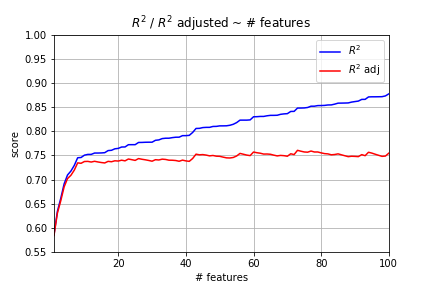

In [72]:
from IPython.display import Image

Image("r^2, adjusted r^2.png")

#### 실습: aromawine 데이터 adjusted r^2 값 구하기

In [66]:
Input_wine = wine.iloc[:,:-1]
Output_wine = wine.iloc[:,-1]

In [67]:
model = LinearRegression()
model.fit(Input_wine, Output_wine)

LinearRegression()

In [68]:
# scikit learn으로 계산
print('*'*30)
print ('R^2: ', model.score(Input_wine, Output_wine))
print('Adjusted R^2: ',  
      1 - (1-model.score(Input_wine, Output_wine)) * (len(Output_wine)-1) 
      / (len(Output_wine)-Input_wine.shape[1]-1))

******************************
R^2:  0.8354464499560966
Adjusted R^2:  0.7367143199297546


<a id='6'></a>

## [명목형 변수 처리](#0)

In [73]:
df = pd.read_csv('student.csv', engine = 'python')
df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [ ]:
data = df.loc[:,['성별', '키','몸무게']]
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data.dropna(inplace=True)
print(data.isnull().sum())

In [ ]:
X = data.loc[:, ['성별', '키']]
y = data.loc[:, ['몸무게']]

In [ ]:
xx = pd.get_dummies(X)
xx

In [ ]:
X = xx.values
y = y.values

rl = LinearRegression()
rl.fit(X,y)

print('기울기: ',rl.coef_)
print('절편:', rl.intercept_)

y_hat = rl.predict(X)

print('R^2: ', rl.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

In [ ]:
data = df.loc[:,['성별', '키','몸무게']]
data.dropna(inplace=True)
data.head()

In [ ]:
mapping = {'남':1, '여':0}
data['성별'] = data['성별'].map(mapping)
data.head()

### 실습: titanic data, Embarked(승선한 항구명) 데이터 dummy variable / mapping

In [74]:
titanic = pd.read_csv('Titanic.csv', engine = 'python')
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [76]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [77]:
titanic_dummies = # columns = ['Embarked']에 대해 원핫인코딩해주세요. hint: pd.get_dummies()사용
titanic_dummies.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,7.2500,0,0,0,1
1,1,female,38.0,1,0,71.2833,1,1,0,0
2,3,female,26.0,0,0,7.9250,1,0,0,1
3,1,female,35.0,1,0,53.1000,1,0,0,1
4,3,male,35.0,0,0,8.0500,0,0,0,1


#### 참고: mapping

In [78]:
titanic = pd.read_csv('Titanic.csv', engine = 'python')
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [79]:
mapping = {'S':1, 'C':2, 'Q':3}
titanic['Embarked'] = titanic['Embarked'].map(mapping)
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,1,0
1,1,female,38.0,1,0,71.2833,2,1
2,3,female,26.0,0,0,7.9250,1,1
3,1,female,35.0,1,0,53.1000,1,1
4,3,male,35.0,0,0,8.0500,1,0


[contents indices]
1. [회귀분석 과제 리뷰](#1)   
2. [VIF](#2)  
3. [정성적 방안: 변수선택법 활용](#3)
4. [기술적 방안](#4)
5. [Adjusted $R^2$](#5)
6. [명목형 변수 처리](#6)